In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = '/content/creditcard.csv'
data = pd.read_csv(df)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.duplicated().sum()

1081

In [ ]:
col_names = data.columns
print(col_names)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
classes, counts = np.unique(data['Class'], return_counts = True)
print(f'Fraud Cases: {counts[0]}')
print(f'Valid Transactions: {counts[1]}')

Fraud Cases: 284315
Valid Transactions: 492


([<matplotlib.patches.Wedge at 0x78bcd41e63b0>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Valid: 284315'),
  Text(1.0999838018177286, -0.005969567707642625, 'Fraud: 284315')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.8%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.2%')])

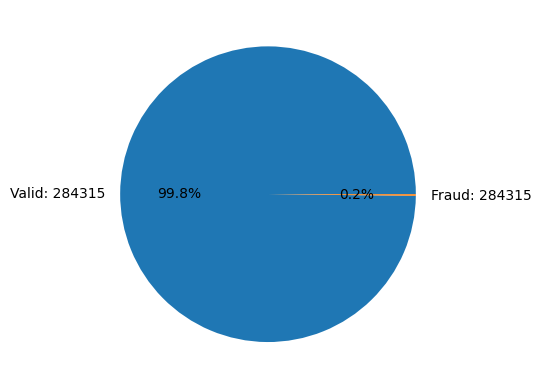

In [ ]:
labels = 'Valid: ' + str(counts[0]), 'Fraud: ' + str(counts[0])
fig, ax = plt.subplots()
ax.pie(counts, labels = labels, autopct = '%1.1f%%')

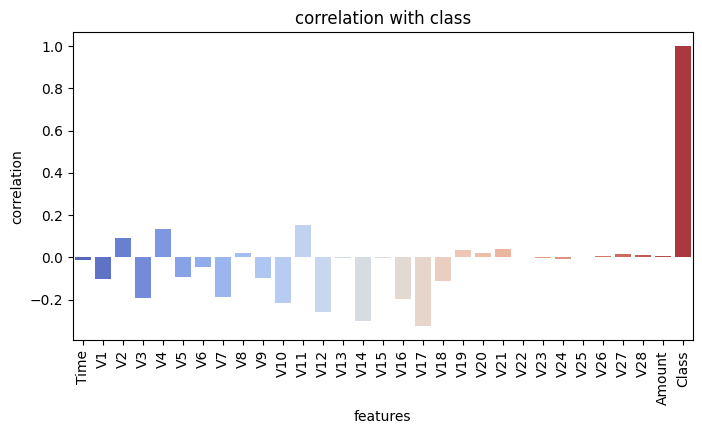

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize = (8, 4))
sns.barplot(x = correlation_matrix.index, y = correlation_matrix['Class'], palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.title('correlation with class')
plt.xlabel('features')
plt.ylabel('correlation')
plt.show()

In [ ]:
columns = data.columns
features_names = columns[columns != 'Class']
features = data[features_names]
target = data['Class']

In [ ]:
print('the shape of the featuers: ', features.shape )
print('the shape of the target  : ', target.shape )

the shape of the featuers:  (284807, 30)
the shape of the target  :  (284807,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 50, stratify = target)

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
221234,142486.0,2.126322,-0.010040,-1.997102,0.276477,0.639165,-0.755860,0.445171,-0.305989,0.707746,...,-0.275343,-0.048907,0.047566,0.023506,0.335408,0.420944,-0.226205,-0.045156,-0.066126,1.00
53575,46051.0,1.100318,0.177618,0.212730,0.966039,-0.232896,-0.122320,-0.236608,0.158837,0.274970,...,-0.085843,-0.084915,0.007497,-0.056042,0.169951,0.425441,0.410297,0.015957,0.032014,12.31
163269,115806.0,-0.565880,0.135593,1.400824,-2.647515,0.858462,-0.121119,0.654774,-0.243942,-1.344053,...,0.272824,-0.330358,-1.037985,-0.215048,-0.015207,0.432703,-0.668484,-0.170773,-0.167245,12.99
246069,153023.0,-1.610536,1.450172,-1.164202,-1.269844,1.317395,2.602690,-0.595004,-0.075000,-0.517055,...,-0.844192,1.565997,-0.560198,0.291749,-1.730249,-0.701429,0.344150,-0.134201,0.013732,22.69
198872,132691.0,-1.124829,1.615882,-0.246758,-1.007567,0.794176,-0.388234,0.852613,0.162459,-0.272138,...,0.123248,-0.252198,-0.636616,-0.118839,-1.025058,-0.115831,0.224957,0.035447,0.208210,7.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,31809.0,-0.866737,0.793163,0.791631,-0.019310,1.675213,4.374922,-0.837459,1.629948,-0.119717,...,0.027757,-0.138033,-0.418125,-0.257635,1.004318,0.445748,-0.304825,0.010633,0.020619,0.76
226406,144613.0,-0.897157,-0.305330,0.001853,-2.283739,-0.794812,0.796014,-0.092902,0.030927,-1.607350,...,-0.620535,-0.413706,-0.415258,0.075932,0.205978,-0.592265,-0.436177,-0.638159,-0.111313,99.83
23564,32822.0,-0.459635,0.752513,1.754365,0.571020,0.284946,-0.071830,0.366709,0.124772,-0.744549,...,0.085457,-0.051137,-0.108876,0.133992,0.106714,-0.720905,0.213609,0.140315,0.140501,3.59
88109,61990.0,0.943566,-1.034119,0.974853,0.648536,-1.377906,0.329313,-0.844338,0.192469,-0.589187,...,-0.206620,-0.262192,-0.556690,-0.103136,-0.036042,0.216285,-0.409985,0.055953,0.057321,168.00


In [ ]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
78573,57594.0,-1.802661,-0.446338,1.885644,0.111443,-0.177271,-0.171790,0.521588,-1.172850,0.317418,...,-0.436326,0.490708,-0.273187,-0.269526,0.346878,-0.444028,0.131845,0.246930,-0.355461,244.28
10936,18768.0,0.683958,-0.662159,2.101559,3.223243,-1.228647,1.602507,-1.166806,0.460169,2.097177,...,0.199198,0.057114,0.484771,-0.319794,0.022789,0.415735,0.193942,0.033409,0.052069,182.22
68153,52857.0,1.165831,-0.040629,0.357115,-0.127504,-0.129957,0.160205,-0.251053,0.176230,-0.143362,...,-0.105406,0.002043,0.074087,0.091461,-0.207983,0.080007,0.968927,-0.049556,-0.011864,1.00
206882,136418.0,-0.439203,0.509613,1.725462,0.040427,0.181494,0.662796,0.043632,0.418858,0.200140,...,-0.159930,0.144137,0.396198,-0.169172,-0.872831,-0.427570,-0.754831,0.211598,0.166942,17.00
249586,154480.0,2.053771,-0.026695,-1.056982,0.404647,-0.072572,-1.118469,0.200392,-0.334515,0.472412,...,-0.202090,-0.278256,-0.638904,0.341586,-0.000999,-0.298342,0.199566,-0.064640,-0.059539,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98784,66814.0,-0.629897,0.896987,1.693464,-0.761492,0.279612,-0.476754,0.755115,0.090040,-0.661572,...,-0.155486,-0.161284,-0.634705,-0.157690,-0.042770,-0.074441,-0.058222,0.014654,0.078221,1.98
255672,157340.0,-1.859376,0.366074,2.175053,0.995249,-1.080733,0.455396,-0.605347,0.933187,0.246235,...,0.268832,0.291230,0.801415,-0.289175,0.043116,0.405561,-0.283570,0.388157,0.122691,100.00
120017,75683.0,1.587636,-0.653303,-0.130132,-1.357203,-1.009641,-1.329988,-0.383969,-0.485594,-2.373611,...,-0.297150,-0.167286,0.009491,-0.082973,0.427501,0.725850,-0.086016,0.007074,0.006781,0.01
113631,73142.0,1.076500,-0.324964,-0.466401,-0.919102,-0.258576,-1.016329,0.389664,-0.160931,0.590014,...,-0.028974,0.150730,0.339162,-0.209846,0.241691,0.748451,-0.460795,-0.000446,0.009301,89.18


In [ ]:
Y_train

221234    0
53575     0
163269    0
246069    0
198872    0
         ..
21691     0
226406    0
23564     0
88109     0
42982     0
Name: Class, Length: 227845, dtype: int64

In [ ]:
Y_test

78573     0
10936     0
68153     0
206882    0
249586    0
         ..
98784     0
255672    0
120017    0
113631    0
256095    0
Name: Class, Length: 56962, dtype: int64

In [ ]:
Y_train.sum()/Y_train.count()

0.001729245759178389

In [ ]:
Y_test.sum()/Y_test.count()

0.0017204452090867595

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state = 50)

In [ ]:
model.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=50)

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

Confusion Matrix:
[[56859     5]
 [   38    60]]


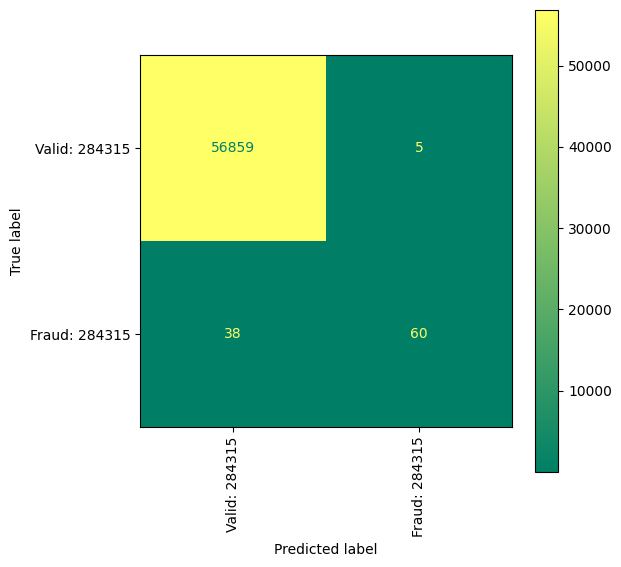

In [ ]:
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

fig, ax = plt.subplots(figsize = (6, 6))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer')

plt.show()

In [ ]:
print('                      Classification Report                      ')
print(classification_report(Y_test, predictions))

                      Classification Report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.61      0.74        98

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_Score = f1_score(Y_test, predictions)

In [ ]:
Report=pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1-Score'])
Report=Report._append({'Model':'Logistic Regression','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':f1_Score}, ignore_index=True)

In [ ]:
Report

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.999245,0.923077,0.612245,0.736196


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, Y_train)

In [ ]:
rf_predictions = rf_model.predict(X_test_scaled)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_predictions))

In [ ]:
cm2 = confusion_matrix(Y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = labels)

fig, ax = plt.subplots(figsize = (6, 6))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer')

plt.show()

In [ ]:
print('                      Classification Report                      ')
print(classification_report(Y_test, rf_predictions))

In [ ]:
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_precision = precision_score(Y_test, rf_predictions)
rf_recall = recall_score(Y_test, rf_predictions)
rf_f1_score = f1_score(Y_test, rf_predictions)

In [ ]:
Report = Report._append({'Model':'Random Forest','Accuracy':rf_accuracy, 'Precision':rf_precision, 'Recall':rf_recall, 'F1-Score':rf_f1_score}, ignore_index=True)

In [ ]:
Report